This notebook is not part of the documentation, it is purely for reproducing images used in the documentation.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

In [2]:
np.random.seed(42)
x1 = np.random.uniform(size=(200, 1))
x2 = x1 + np.random.normal(loc=0.0, scale=0.15, size=(200, 1))

X = np.hstack((x1, x2))

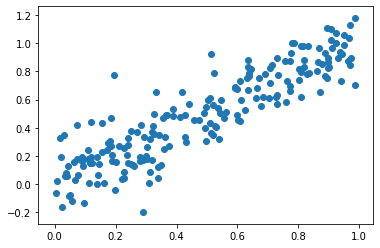

In [3]:
plt.scatter(x1, x2);

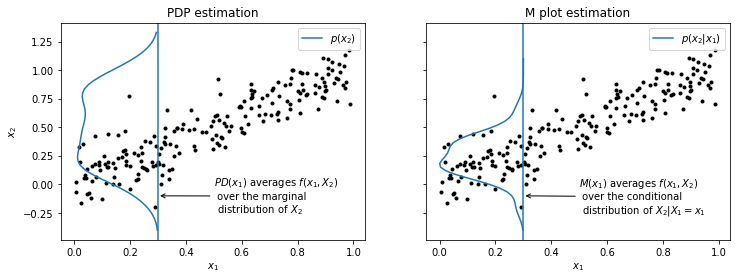

In [4]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4), sharey='row')

POINT = 0.3

ax[0].scatter(x1, x2, marker='.', c='k');
ax[0].set_xlabel('$x_1$');
ax[0].set_ylabel('$x_2$');
ax[0].axvline(POINT);
ax[0].set_title('PDP estimation')

# marginal density plot
x = np.linspace(-0.4, 1.33)
marginal = gaussian_kde(x2.squeeze())
height = marginal(x)
height *= POINT # squish to fit in axes

ax[0].plot(-height + POINT , x, label='$p(x_2)$')

# text
pd_text = '$PD(x_1)$ averages $f(x_1, X_2)$\n over the marginal\n distribution of $X_2$'
ax[0].annotate(pd_text, (0.3, -0.1), xytext=(0.5, -0.25),
               arrowprops={'arrowstyle':'->'});
ax[0].legend();


ax[1].scatter(x1, x2, marker='.', c='k');
ax[1].set_xlabel('$x_1$');
ax[1].axvline(0.3);
ax[1].set_title('M plot estimation');

# conditional density plot
x = x2[(x1 > POINT-0.05) & (x1 < POINT+0.05)]
conditional = gaussian_kde(x.squeeze())
x = np.linspace(-0.4, 1.1)
height = conditional(x)
height = (height / height.max()) * POINT

ax[1].plot(-height + POINT, x, label='$p(x_2|x_1)$');

# text
m_text = '$M(x_1)$ averages $f(x_1, X_2)$\n over the conditional\n distribution of $X_2| X_1=x_1$'
ax[1].annotate(m_text, (0.3, -0.1), xytext=(0.5, -0.25),
               arrowprops={'arrowstyle':'->'});
ax[1].legend();

In [5]:
fig.savefig('pdp_m.png', bbox_inches='tight')

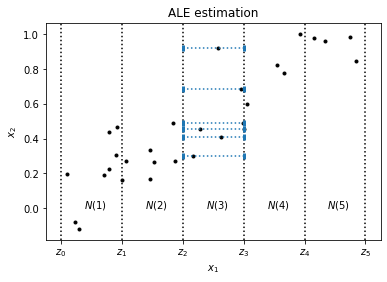

In [74]:
N = 30
subx1 = x1[:N]
subx2 = x2[:N]

fig, ax = plt.subplots()
ax.scatter(subx1, subx2, marker='.', c='k')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$');
ax.set_title('ALE estimation')

# vertical lines
VLINES = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
for line in VLINES:
    ax.axvline(line, ls=':', c='k');

# ALE
LOWER = 0.4
UPPER = 0.6
for px1, px2 in zip(subx1, subx2):
    if (px1 > LOWER) & (px1 < UPPER):
        ax.plot([LOWER, UPPER], [px2, px2], ls=':', marker='|', mew=3, c='C0');

# labels for intervals
labels = ['$N(1)$', '$N(2)$', '$N(3)$', '$N(4)$', '$N(5)$']
offset = 0.025
positions = np.array([0.1, 0.3, 0.5, 0.7, 0.9]) - offset

for pos, lab in zip(positions, labels):
    ax.text(pos, 0.0, lab);

ax.set_xticks(VLINES);
ax.set_xticklabels(['$z_0$', '$z_1$', '$z_2$', '$z_3$', '$z_4$', '$z_5$']);

In [75]:
fig.savefig('ale.png', bbox_inches='tight')